# Projet3 : Chaines de Markov et épidémiologie 

In [3]:
#quelques bibliothèque utiles
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import matplotlib

# Partie 1
### Question 1 : 
A partir de la séquence d’observation S, S, S, I, I, I, I, I, I, R, on peut déduir les pobabilité de transition comme la formule suivant : $p(x|y)=P(c_i|c_{i-1})$ avec $x, y \in \{S, I, R \}$

Et la matrice de probabilité de transitions est :
$$\begin{matrix}
 & S & I & R \\
S & \frac{2}{3} & \frac{1}{3} & 0 \\
I & 0 & \frac{5}{6} & \frac{1}{6} \\
R & 0 & 0 & 1 
\end{matrix}$$

In [4]:
#Partie 1; Question 2 lire des données
np.loadtxt('data_exo.txt')

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 2., 2., 2.],
       [0., 0., 0., ..., 2., 2., 2.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 1., ..., 2., 2., 2.],
       [0., 0., 0., ..., 1., 1., 1.]])

In [5]:
#Partie 1; Question 1.3
def matriceTransition(ficNom):
    """
    Entree : nom du ficher
    Sortie : la matrice de probabilité de transitions
    """
    ls = np.loadtxt(ficNom)
    ss, si, ii, ir, rr, rs = 0, 0, 0, 0, 0, 0  
    
    for i in range(0, len(ls)):
        l = len(ls[i])
        #les cas different
        for j in range(1, l):
            if(ls[i][j-1] == 0 and ls[i][j] == 0):
                ss+=1
            if(ls[i][j-1] == 0 and ls[i][j] == 1):
                si+=1
            if(ls[i][j-1] == 1 and ls[i][j] == 1):
                ii+=1
            if(ls[i][j-1] == 1 and ls[i][j] == 2):
                ir+=1
            if(ls[i][j-1] == 2 and ls[i][j] == 2):
                rr+=1
            if(ls[i][j-1] == 2 and ls[i][j] == 0):
                rs+=1
    #calculation
    return np.array([[ss/(ss + si), (si/(ss + si)), 0], 
                    [0, ii/(ii + ir), ir/(ii + ir)], 
                    [rs/(rs + rr), 0, rr/(rs + rr)]])
        

In [6]:
#test pour matriceTransition()
matriceTransition('data_exo.txt')

array([[0.93082918, 0.06917082, 0.        ],
       [0.        , 0.93518148, 0.06481852],
       [0.04065945, 0.        , 0.95934055]])

# Partie 2 
### Question 1:
A partir du graphe de transition, la matrice de transition A est :
$$\begin{matrix}
 & S & I & R \\
S & 0.92 & 0.08 & 0 \\
I & 0 & 0.93 & 0.07 \\
R & 0 & 0 & 1 
\end{matrix}$$

Pour vérifier si une matrice de transition est stochastique, on doit ajouter la valeur de contenue de chaque ligne. Si la somme vaut 1, la matrice est stochastique.

In [7]:
def verifierMat(matrice):
    """
    Entree : une matrice en format de list[list[float]]
    Sorite : retourne 1 si la matrice est stochastique, et 0 sinon
    """
    #parcours la matrice
    for i in range(len(matrice)):
        sommeLigne=0
        for j in range(len(matrice[i])):
            sommeLigne+=matrice[i][j]
        if not sommeLigne==1:
            return 0
    return 1

In [8]:
#test pour verifierMat()
MatA=np.array([[0.92, 0.08, 0], [0, 0.93, 0.07], [0, 0, 1]])
print(verifierMat(MatA))

1


### Question 2 :
Au temps t = 0, un individu a une probabilité de 0.9 d’être sain et 0.1 d’être infecté.
Donc, on a : $\pi_0 = [0.9, 0.1, 0]$

# Distribution $π_t$
### Question 1 :
$\pi_1[0]=\pi_0[0]*P_{ss}=0.828$ <br>
$\pi_1[1]=\pi_0[0]*P_{si}+\pi_0[1]*P_{ii}=0.165$ <br>
$\pi_1[2]=\pi_0[2]+\pi_0[1]*P_{ir}=0.007$ <br>


### Question 2 :
$\pi_2[0]=\pi_1[0]*P_{ss}=0.76176$ <br>
$\pi_2[1]=\pi_1[0]*P_{si}+\pi_1[1]*P_{ii}=0.21969$ <br>
$\pi_2[2]=\pi_1[1]*P_{ir}=0.01855$ <br>

### Question 3:
$\pi_t[0]=\pi_t-1[0]*P_{ss}$ <br>
$\pi_t[1]=\pi_t-1[0]*P_{si}+\pi_t-1[1]*P_{ii}$ <br>
$\pi_t[2]=\pi_t-1[1]*P_{ir}$ <br>

In [9]:
#Question 3 : La distribution théorique dans chaque états
def calDistribution(t, matrice, pi_0):
    """
    Entree : 
        t: le temps pour chaque états
        matrice : la matrice de transition
        pi_0 : distribution de probabilité initiale
    Sortie :
        distribution théorique des effectifs
    """
    res=list(pi_0)
    for i in range(t):
        tmp=res
        #calculation pour les 3 états : S, I, R
        res[0]=tmp[0]*matrice[0][0]
        res[1]=tmp[0]*matrice[0][1] + tmp[1]*matrice[1][1]
        res[2]+=tmp[1]*matrice[1][2]

    return res

# Question 4 : Tracer la graphe de la probabilité transitions
def drawGraphe(t, matrice, list_T0):
    """
    retourne une graphe lineaire
    """
    sain, infecte, gueri, T=[], [], [], []
    
    for i in range(t):
        distribution=calDistribution(i, matrice, list_T0)
        T.append(i)
        sain.append(distribution[0])
        infecte.append(distribution[1])
        gueri.append(distribution[2])   
    
    x=np.arange(20,350)
    l1=plt.plot(T, sain,'r--',label='Sain')
    l2=plt.plot(T, infecte,'g--',label='Infecté')
    l3=plt.plot(T, gueri,'b--',label='Guéri')
    plt.plot(T, sain,'r--', T, infecte,'g--', T, gueri, 'b--')
    plt.title('probabilité de transitions dans chaque état')
    plt.xlabel('temps')
    plt.ylabel('probabilité')
    plt.legend()
    plt.show()

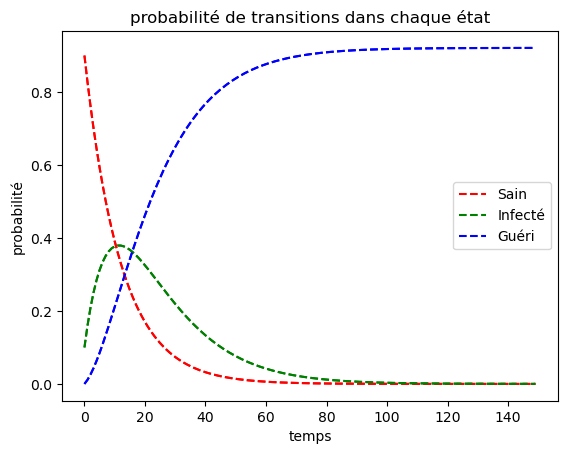

In [10]:
# test pour calDistribution() et drawGraphe()
pi_0=[0.9, 0.1, 0]
drawGraphe(150, MatA, pi_0)

A partir du graphique, nous pouvons analyser :<br>
Après environ 10 jours, le nombre de personnes infectées atteint un maximum ; après environ 100 jours, tout le monde est guéri (ou n'a jamais été infecté).

# Tirage aléatoire des états



In [11]:
def creatMarkov(nbSequence, matrice, pi_0):
    """
    Entree : 
        nbSequence : la taille de liste T
        matrice, pi_0 : le même
    Sortie : 
        une chaine Markov en base de "matrice" et " pi_0"
    """
    chaine=[]
    prob=rd.uniform(0, 1)       #creer une valeur au hasard entre (0, 1)
    
    #insertion du premier letter
    if prob > pi_0[0]:
        chaine.append(1)
    else:
        chaine.append(0)
        while(len(chaine) < nbSequence):      #transitions 0->0
            prob=rd.uniform(0, 1)
            if prob > matrice[0][0]:      
                chaine.append(1)              #on utilise "break" ici,
                break                         #car il n'y pas une transition de 1->0
            chaine.append(0)
    
    while(len(chaine) < nbSequence):          #transitions 1->1
        prob=rd.uniform(0, 1)
        if prob > matrice[1][1]:
            chaine.append(2)
            break
        chaine.append(1)
        
    for i in range(len(chaine), nbSequence):  #transition 2->2
        chaine.append(2)
    
    return chaine

In [12]:
#test pour creatMarkov()
print(creatMarkov(150, MatA, pi_0))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


# Modélisation d’une population

In [13]:
#Question 1
def countNum(population, t):
    """
    Entree 
        population : en forme de une liste de chaine Markov pour chaque individus
        t : le temps
    Sortie 
        le nombre d'individus pour chaque états dans chaque jour
    """
    nbS, nbI, nbR=0, 0, 0
    for j in range(len(population)):
        if population[j][t]== 0:
            nbS+=1
        if population[j][t]== 1:
            nbI+=1
        if population[j][t]== 2:
            nbR+=1
    return [nbS, nbI, nbR]

#Question 2
def showPercent(numListe):
    """
    Entree : le nombre d'individus pour chaque états
    Sortie : la pourcentage de chaque états
    """
    nbSomme=numListe[0]+numListe[1]+numListe[2]
    return [numListe[0]/nbSomme, numListe[1]/nbSomme, numListe[2]/nbSomme]

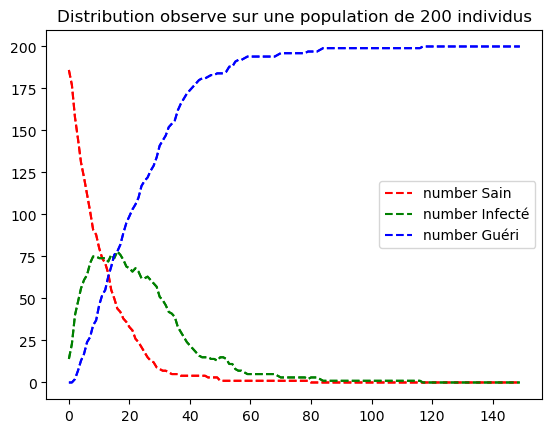

In [14]:
#test pour le module d'une population
#une population de 5 individus
listePopulation1=[[] for i in range(50)]
for i in range(5):
    listePopulation1[i]=creatMarkov(150, MatA, pi_0)
    
#une population de 200 individus
listePopulation2=[[] for i in range(200)]
for i in range(200):
    listePopulation2[i]=creatMarkov(150, MatA, pi_0)

#une population de 1000 individus
listePopulation3=[[] for i in range(1000)]
for i in range(1000):
    listePopulation3[i]=creatMarkov(150, MatA, pi_0)

T, numS, numI, numR=[], [], [], []
for i in range(150):
    numListe=countNum(listePopulation2, i)
    T.append(i)
    numS.append(numListe[0])
    numI.append(numListe[1])
    numR.append(numListe[2])
    
x=np.arange(20,350)
l1=plt.plot(T, numS,'r--',label='number Sain')
l2=plt.plot(T, numI,'g--',label='number Infecté')
l3=plt.plot(T, numR,'b--',label='number Guéri')
plt.plot(T, numS,'r--', T, numI,'g--', T, numR, 'b--')
plt.title('Distribution observe sur une population de 200 individus')
plt.legend()
plt.show()


# Longueur de l’infection

In [15]:
#pour Question 1
def countInfectionListe(chaineSequence):
    """
    retourne la longueur de la sequence infecté pour un individu
    """
    count=0
    for i in range(len(chaineSequence)):
        if chaineSequence[i]==1:
            count+=1
    return count

def countInfectionPopulation(population):
    """
    retourne la longueur moyenne de la sequence infecté
    """
    sommeInfection=0
    for i in range(len(population)):
        sommeInfection+=countInfectionListe(population[i])
    return int(sommeInfection/len(population))

In [16]:
#test pour countInfection()
print("la longueur moyenne d’une séquence de I pour une population de 1000 personne : {:f}".format(countInfectionPopulation(listePopulation3)))

la longueur moyenne d’une séquence de I pour une population de 1000 personne : 14.000000


### Question 3 
En cas de la longueur de chaine Markov est assez grand, par exemple 150 <br>
donc, ce qui veut dire que un individu peut définitivement passer d'un état infecté à un état guéri au cours de cette période.

Par conséquent, la moyenne de longueur théorique d’une séquence de I est égale à l'espériance de $X ～ GE(P_{IR})$ <br>
$E(x)=\frac {1} {P_{IR}}\approx14.286$ pour une population de 1000 individus

### Question 4
Pour éviter les événements fortuits, nous calculons la longueur moyenne d’une séquence de I pour une population de 1000 individus  k fois et prenons la moyenne pour obtenir la longueur estimée

In [17]:
def countEstimeLen(k):
    """
    retourne la moyenne de la longueur estimée dans k fois
    """
    somme=0
    for i in range(k):
        listePopulation=[[] for i in range(1000)]
        for i in range(1000):
            listePopulation[i]=creatMarkov(150, MatA, pi_0)
        somme+=countInfectionPopulation(listePopulation)
    return int(somme/k)

In [18]:
print("longueur estimée moyenne en {:d} fois est : {:d}".format(1000, countEstimeLen(1000)))
print("longueur théorique est : 14.286")

longueur estimée moyenne en 1000 fois est : 13
longueur théorique est : 14.286


In [26]:
#pour Question 2
def infectionEstime(population):
    """
    Affichez la distribution estimé de la longueur d’infection
    """
    infectionDic={}
    for i in range(len(population)):
        lengthChaine=countInfectionListe(population[i])
        if lengthChaine not in infectionDic.keys():
            infectionDic[lengthChaine]=1/len(population)
        else:
            infectionDic[lengthChaine]+=1/len(population)
    
    return infectionDic

#pour Question 5
def infectionTheorique(length, p_ir):
    """
    Affichez la distribution théorique de la longueur d’infection
    """
    infectionDic={}
    for i in range(length):
        infectionDic[i+1]=(1-p_ir)**(i-1) * p_ir
    
    return infectionDic

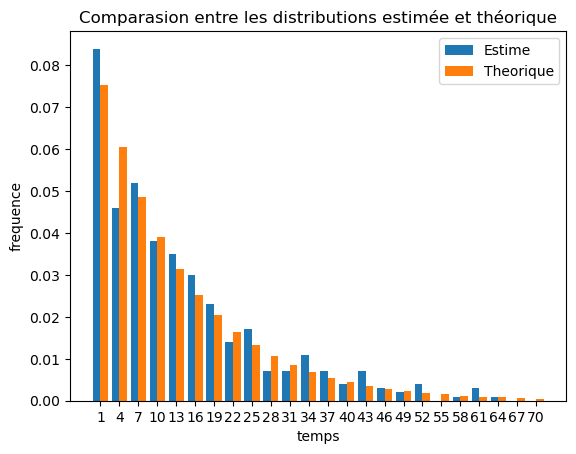

In [72]:
#affichage de l'histogramme d'infection estimée et théorique
dic1=infectionEstime(listePopulation3)
dic2=infectionTheorique(70, 0.07)
width = 0.4

#lire les données sur les dictionaire
value2 = sorted(dic2.items(),key = lambda item:item[1],reverse=True)
x=[]
y1, y2=[], []
for d in value2:
    x.append(d[0])
    y2.append(d[1])
    if d[0] in dic1.keys():
        y1.append(dic1[d[0]])
    else:
        y1.append(0)
    
x=[x[i] for i in range(len(x)) if i%3==0]
y1=[y1[i] for i in range(len(y1)) if i%3==0]
y2=[y2[i] for i in range(len(y2)) if i%3==0]
coor = np.arange(len(x))
fig, ax = plt.subplots()
rects1 = ax.bar(coor - width/2, y1, width, label='Estime')
rects2 = ax.bar(coor + width/2, y2, width, label='Theorique')
ax.set_ylabel('frequence')
ax.set_xlabel('temps')
ax.set_title('Comparasion entre les distributions estimée et théorique')
ax.set_xticks(coor)
ax.set_xticklabels(x)
ax.legend()

### Petites modifications autour de ce premier modèle
1. la taille de la population

Text(0.5, 1.0, 'population 5000')

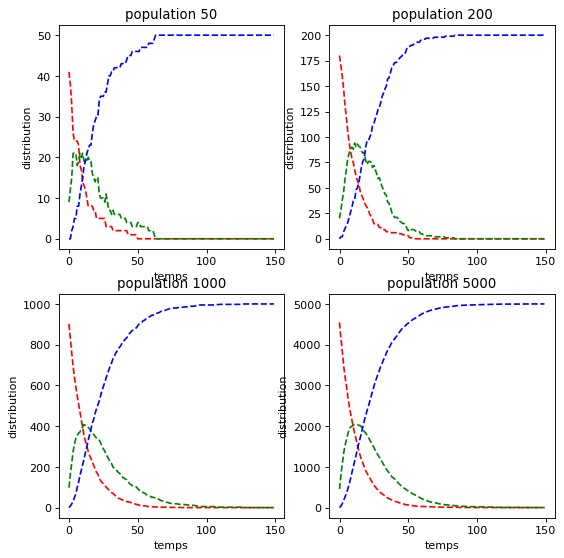

In [68]:
#4 cas : population avec 50, 200, 1000, 5000
testPopulation1=[[] for i in range(50)]
for i in range(50):
    testPopulation1[i]=creatMarkov(150, MatA, pi_0)
    
#une population de 200 individus
testPopulation2=[[] for i in range(200)]
for i in range(200):
    testPopulation2[i]=creatMarkov(150, MatA, pi_0)

#une population de 1000 individus
testPopulation3=[[] for i in range(1000)]
for i in range(1000):
    testPopulation3[i]=creatMarkov(150, MatA, pi_0)

#une population de 1000 individus
testPopulation4=[[] for i in range(5000)]
for i in range(5000):
    testPopulation4[i]=creatMarkov(150, MatA, pi_0)

T=[] 
numS1, numI1, numR1=[], [], []
numS2, numI2, numR2=[], [], []
numS3, numI3, numR3=[], [], []
numS4, numI4, numR4=[], [], []
for i in range(150):
    numListe1=countNum(testPopulation1, i)
    numListe2=countNum(testPopulation2, i)
    numListe3=countNum(testPopulation3, i)
    numListe4=countNum(testPopulation4, i)
    
    T.append(i)
    #Données de stockage: population 50
    numS1.append(numListe1[0])
    numI1.append(numListe1[1])
    numR1.append(numListe1[2])
    #Données de stockage: population 200
    numS2.append(numListe2[0])
    numI2.append(numListe2[1])
    numR2.append(numListe2[2])
    #Données de stockage: population 1000
    numS3.append(numListe3[0])
    numI3.append(numListe3[1])
    numR3.append(numListe3[2])
    #Données de stockage: population 5000
    numS4.append(numListe4[0])
    numI4.append(numListe4[1])
    numR4.append(numListe4[2])

plt.figure(figsize=(8,8), dpi=80)
plt.figure(1)
ax1 = plt.subplot(221)
ax1.plot(T, numS1,'r--', T, numI1,'g--', T, numR1, 'b--')
ax1.set_ylabel('distribution')
ax1.set_xlabel('temps')
ax1.set_title('population 50')

ax2 = plt.subplot(222)
ax2.plot(T, numS2,'r--', T, numI2,'g--', T, numR2, 'b--')
ax2.set_ylabel('distribution')
ax2.set_xlabel('temps')
ax2.set_title('population 200')

ax3 = plt.subplot(223)
ax3.plot(T, numS3,'r--', T, numI3,'g--', T, numR3, 'b--')
ax3.set_ylabel('distribution')
ax3.set_xlabel('temps')
ax3.set_title('population 1000')

ax4 = plt.subplot(224)
ax4.plot(T, numS4,'r--', T, numI4,'g--', T, numR4, 'b--')
ax4.set_ylabel('distribution')
ax4.set_xlabel('temps')
ax4.set_title('population 5000')

Nous pouvons dire que lorsque la population est relativement grande, il y a peu de différence dans le changement de la taille de la population entre les différentes étapes.

2. la distribution de probabilité initiale
Dans cette section, nous nous concentrerons uniquement sur les tendances du nombre de personnes infectées.

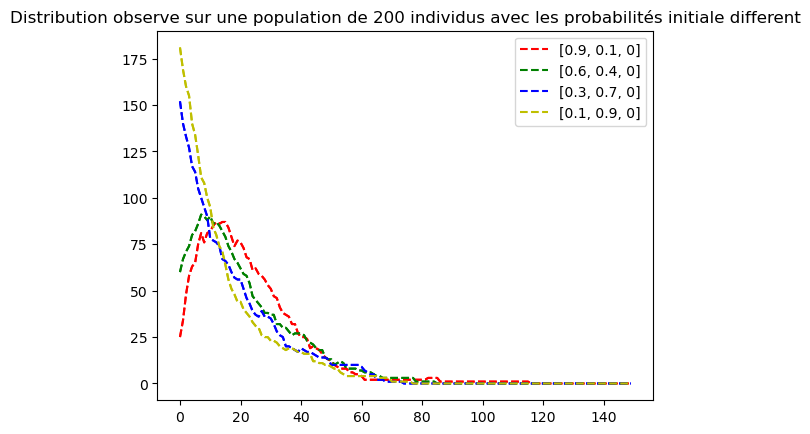

In [78]:
#la définition des probablité initiale différent
p1_0=[0.9, 0.1, 0]
p2_0=[0.6, 0.4, 0]
p3_0=[0.3, 0.7, 0]
p4_0=[0.1, 0.9, 0]


testPopulation1=[[] for i in range(200)]
for i in range(200):
    testPopulation1[i]=creatMarkov(150, MatA, p1_0)

testPopulation2=[[] for i in range(200)]
for i in range(200):
    testPopulation2[i]=creatMarkov(150, MatA, p2_0)

testPopulation3=[[] for i in range(200)]
for i in range(200):
    testPopulation3[i]=creatMarkov(150, MatA, p3_0)

testPopulation4=[[] for i in range(200)]
for i in range(200):
    testPopulation4[i]=creatMarkov(150, MatA, p4_0)
    
T, tendence1, tendence2, tendence3, tendence4=[], [], [], [], []
for i in range(150):
    numListe1=countNum(testPopulation1, i)
    numListe2=countNum(testPopulation2, i)
    numListe3=countNum(testPopulation3, i)
    numListe4=countNum(testPopulation4, i)
    T.append(i)
    #Données de stockage: nombre des personnes infectées 
    tendence1.append(numListe1[1])
    tendence2.append(numListe2[1])
    tendence3.append(numListe3[1])
    tendence4.append(numListe4[1])
#produit le graph
x=np.arange(20,350)
l1=plt.plot(T, tendence1,'r--',label=p1_0)
l2=plt.plot(T, tendence2,'g--',label=p2_0)
l3=plt.plot(T, tendence3,'b--',label=p3_0)
l4=plt.plot(T, tendence4,'y--',label=p4_0)
plt.plot(T, tendence1,'r--', T, tendence2,'g--', T, tendence3, 'b--', T, tendence4, 'y--')
plt.title('Distribution observe sur une population de 200 individus avec les probabilités initiale different')
plt.legend()
plt.show()

3. les probabilités de transition
Dans cette section, nous nous concentrerons uniquement sur les tendances du nombre de personnes infectées.

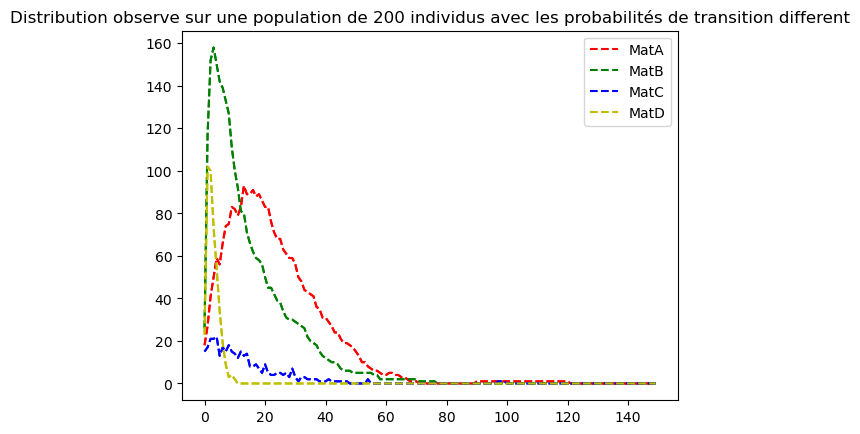

In [79]:
#la définition des probablité de transition différent
MatA=np.array([[0.92, 0.08, 0], [0, 0.93, 0.07], [0, 0, 1]])
MatB=np.array([[0.5, 0.5, 0], [0, 0.93, 0.07], [0, 0, 1]])
MatC=np.array([[0.92, 0.08, 0], [0, 0.5, 0.5], [0, 0, 1]])
MatD=np.array([[0.5, 0.5, 0], [0, 0.5, 0.5], [0, 0, 1]])

testPopulation1=[[] for i in range(200)]
for i in range(200):
    testPopulation1[i]=creatMarkov(150, MatA, pi_0)

testPopulation2=[[] for i in range(200)]
for i in range(200):
    testPopulation2[i]=creatMarkov(150, MatB, pi_0)

testPopulation3=[[] for i in range(200)]
for i in range(200):
    testPopulation3[i]=creatMarkov(150, MatC, pi_0)

testPopulation4=[[] for i in range(200)]
for i in range(200):
    testPopulation4[i]=creatMarkov(150, MatD, pi_0)
    
T, tendence1, tendence2, tendence3, tendence4=[], [], [], [], []
for i in range(150):
    numListe1=countNum(testPopulation1, i)
    numListe2=countNum(testPopulation2, i)
    numListe3=countNum(testPopulation3, i)
    numListe4=countNum(testPopulation4, i)
    T.append(i)
    #Données de stockage: nombre des personnes infectées 
    tendence1.append(numListe1[1])
    tendence2.append(numListe2[1])
    tendence3.append(numListe3[1])
    tendence4.append(numListe4[1])
#produit le graph
x=np.arange(20,350)
l1=plt.plot(T, tendence1,'r--',label='MatA')
l2=plt.plot(T, tendence2,'g--',label='MatB')
l3=plt.plot(T, tendence3,'b--',label='MatC')
l4=plt.plot(T, tendence4,'y--',label='MatD')
plt.plot(T, tendence1,'r--', T, tendence2,'g--', T, tendence3, 'b--', T, tendence4, 'y--')
plt.title('Distribution observe sur une population de 200 individus avec les probabilités de transition different')
plt.legend()
plt.show()

# Partie 3 Description du second modèle
# Analyse du modèle


In [ ]:
#Question 3.5 :
def calDistributionNew(t, matrice, pi_0):
    """
    Entree : 
        t: le temps pour chaque états
        matrice : la matrice de transition
        pi_0 : distribution de probabilité initiale
    Sortie :
        distribution théorique des effectifs
    """
    res=list(pi_0)
    for i in range(t):
        tmp=list(res)
        #calculation pour les 3 états : S, I, R
        res[0]=tmp[0]*matrice[0][0]+tmp[2]*matrice[2][0]
        res[1]=tmp[0]*matrice[0][1]+tmp[1]*matrice[1][1]
        res[2]=tmp[1]*matrice[1][2]+tmp[2]*matrice[2][2]

    return res

def drawGrapheNew(t, matrice, list_T0):
    """
    retourne une graphe lineaire
    """
    sain, infecte, gueri, T=[], [], [], []
    
    for i in range(t):
        distribution=calDistributionNew(i, matrice, list_T0)
        T.append(i)
        sain.append(distribution[0])
        infecte.append(distribution[1])
        gueri.append(distribution[2])   
    
    x=np.arange(20,350)
    l1=plt.plot(T, sain,'r--',label='Sain')
    l2=plt.plot(T, infecte,'g--',label='Infecté')
    l3=plt.plot(T, gueri,'b--',label='Guéri')
    plt.plot(T, sain,'r--', T, infecte,'g--', T, gueri, 'b--')
    plt.title('probabilité de transitions dans chaque état')
    plt.xlabel('temps')
    plt.ylabel('probabilité')
    plt.legend()
    plt.show()

p0=[0.9,0.1,0]
m=[[0.92,0.08,0],[0,0.93,0.07],[0.02,0,0.98]]
drawGrapheNew(200,m,p0)
#S diminue rapidement, I augmente d'abord puis diminue, R augmente régulièrement

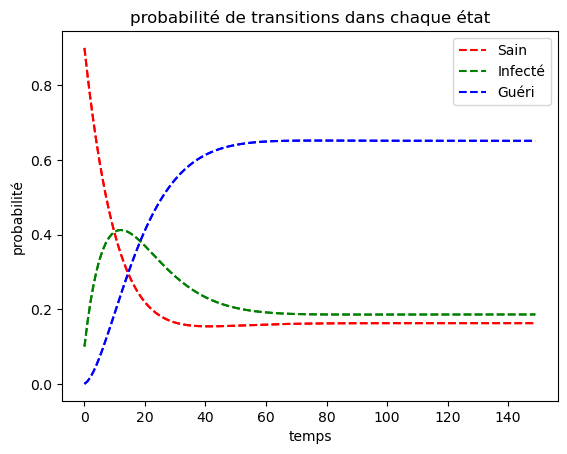

In [24]:
#Question 3.6 :
#??? 
drawGrapheNew(150,m,p0)

In [ ]:

#Quelle que soit la situation initiale, les proportions des trois groupes SIR tendent 
#vers la même valeur après une période de transmission suffisamment longue.
